# problem:- Prediction of Credit Card Default

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Telangana from April 2018 to September 2019.

# Table of Content

* [Objectives](#obj)
* [Importing packages and loading data](#imp)
* [Feature Engineering](#fe)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Mapping the target: categorizing](#map)
    * [Descriptive Statistics](#stat)
    * [Standardizing and plotting features](#std)
    * [Correlation](#corr)
* [Machine Learning: Classification models](#ml)
    * [Feature Selection](#fs)
    * [Spliting the data: train and test](#sp)
    * [GausionNB()](#NB)
    * [KNeighborsClassifier](#KNN)
    * [ BaggingClassifier](#BT)
    * [ExtraTree-decision](#tree)
    * [Random-Forest Classifier](#rf)
    * [GradientBoostingClassifier](#GBM)
    * [ AdaBoostClassifier](#AB)
* [Comparison of model performance](#sum)
    * [Mean Accuracy (coss-validation)](#ac)
    * [Precision, Recall, F1-score](#m)

## Importing the libraries which we need

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
startTimeScript = datetime.now()

# Lading the dataset and check the shape

In [4]:
df = pd.read_csv('C:\\Users\\welcome\\Documents\\aa jupitor\\PROJECT\\Credit_Card.csv')

In [5]:
df.shape

(30000, 25)

In [6]:
df.head()

,CID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# w have a unwanted CID column so we removed it
df.pop('CID')

0            1
1            2
2            3
3            4
4            5
         ...  
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: CID, Length: 30000, dtype: int64

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
#checking which type of data we have
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [11]:
#finding the null values
df.isnull().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

# Finding the out liers

In [13]:
df.rename(columns={"default payment next month": "Default"}, inplace=True)
#df.drop('CID', axis = 1, inplace =True) # drop column "ID"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
Default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [14]:
y = df.Default     # target default=1 or non-default=0
features = df.drop('Default', axis = 1, inplace = False)
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 30000, dtype: int64

In [15]:
df.rename(columns={"PAY_0":"PAY_1"}, inplace=True)

In [16]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


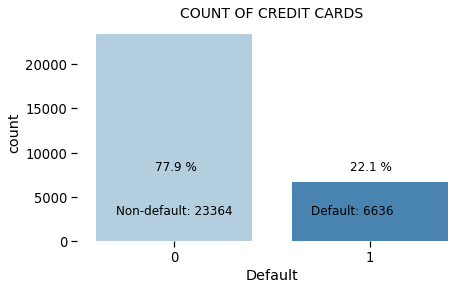

In [17]:
# The frequency of defaults
yes = df.Default.sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=df, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

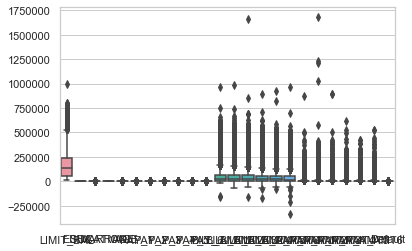

In [18]:
sns.set(style = "whitegrid")
sns.boxplot(data=df)

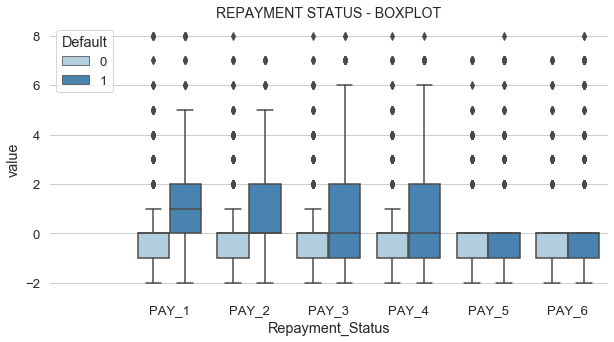

In [19]:
Repayment = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

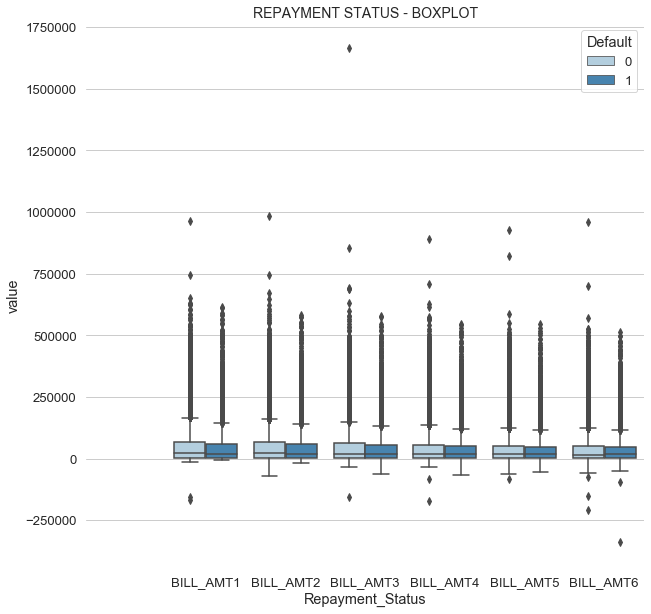

In [20]:
Repayment = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

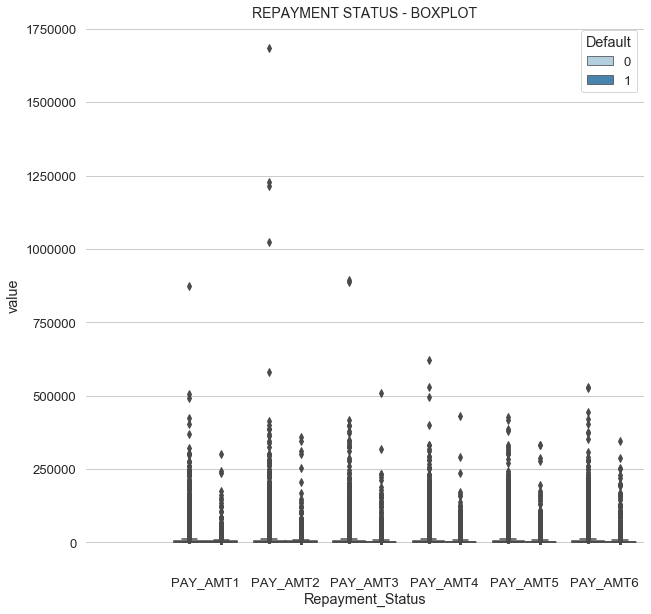

In [21]:
Repayment = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

In [ ]:
#sns.boxplot(df['BILL_AMT5'])

In [ ]:
#ns.boxplot(df['PAY_1'])

# Removing outliers usinng inter_quartile range

In [ ]:
# def detect_outlier(df):
#     for i in df.describe().columns:
#         Q1 = df.describe().at['25%',i]
#         Q3 = df.describe().at['75%',i]
#         IQR = Q3 - Q1
#         LTV = Q1 - 1.5*IQR 
#         UTV = Q3 + 1.5*IQR
#         df[i] = df[i].mask(df[i]<LTV,LTV)
#         df[i] = df[i].mask(df[i]>UTV,UTV)
#     return df

In [ ]:
#out = detect_outlier(df)
#out

In [ ]:
#sns.boxplot('Humidity',data = entireDataset)

#q1, q3 = np.percentile(entireDataset['Humidity'],[25,75])

#IQR = q3-q1      
#LTV = q1 - 1.5*IQR 
#UTV = q3 + 1.5*IQR

#q1,q3,IQR,LTV,UTV

# oulier in lower terminal 
#entireDataset['Humidity'] = entireDataset['Humidity'].mask(entireDataset['Humidity']<UTV,UTV) 

#(comment : if you have outlier in upper terminal then set 

# entireDataset['Humidity'] = entireDataset['Humidity'].mask(entireDataset['Humidity']>UTV,UTV

In [22]:
q1, q3 = np.percentile(df['LIMIT_BAL'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR

q1,q3,IQR,LTV,UTV

#(comment : if you have outlier in upper terminal then set)

df['LIMIT_BAL'] = df['LIMIT_BAL'].mask(df['LIMIT_BAL']>UTV,UTV)

In [23]:
q1, q3 = np.percentile(df['PAY_1'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_1'] = df['PAY_1'].mask(df['PAY_1']>UTV,UTV)
df['PAY_1'] = df['PAY_1'].mask(df['PAY_1']<LTV,LTV)

In [24]:
q1, q3 = np.percentile(df['PAY_2'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_2'] = df['PAY_2'].mask(df['PAY_2']>UTV,UTV)
df['PAY_2'] = df['PAY_2'].mask(df['PAY_2']<LTV,LTV)

In [25]:
q1, q3 = np.percentile(df['PAY_3'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_3'] = df['PAY_3'].mask(df['PAY_3']>UTV,UTV)
df['PAY_3'] = df['PAY_3'].mask(df['PAY_3']<LTV,LTV)

In [26]:
q1, q3 = np.percentile(df['PAY_4'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_4'] = df['PAY_4'].mask(df['PAY_4']>UTV,UTV)
df['PAY_4'] = df['PAY_4'].mask(df['PAY_4']<LTV,LTV)

In [27]:
q1, q3 = np.percentile(df['PAY_5'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_5'] = df['PAY_5'].mask(df['PAY_5']>UTV,UTV)
df['PAY_5'] = df['PAY_5'].mask(df['PAY_5']<LTV,LTV)

In [28]:
q1, q3 = np.percentile(df['PAY_6'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_6'] = df['PAY_6'].mask(df['PAY_6']>UTV,UTV)
df['PAY_6'] = df['PAY_6'].mask(df['PAY_6']<LTV,LTV)

In [29]:
q1, q3 = np.percentile(df['BILL_AMT1'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['BILL_AMT1'] = df['BILL_AMT1'].mask(df['BILL_AMT1']>UTV,UTV)
df['BILL_AMT1'] = df['BILL_AMT1'].mask(df['BILL_AMT1']<LTV,LTV)

In [30]:
q1, q3 = np.percentile(df['BILL_AMT2'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['BILL_AMT2'] = df['BILL_AMT2'].mask(df['BILL_AMT2']>UTV,UTV)

In [31]:
q1, q3 = np.percentile(df['BILL_AMT3'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['BILL_AMT3'] = df['BILL_AMT3'].mask(df['BILL_AMT3']>UTV,UTV)
df['BILL_AMT3'] = df['BILL_AMT3'].mask(df['BILL_AMT3']<LTV,LTV)

In [32]:
q1, q3 = np.percentile(df['BILL_AMT4'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['BILL_AMT4'] = df['BILL_AMT4'].mask(df['BILL_AMT4']>UTV,UTV)
df['BILL_AMT4'] = df['BILL_AMT4'].mask(df['BILL_AMT4']<LTV,LTV)

In [33]:
q1, q3 = np.percentile(df['BILL_AMT5'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['BILL_AMT5'] = df['BILL_AMT5'].mask(df['BILL_AMT5']>UTV,UTV)
df['BILL_AMT5'] = df['BILL_AMT5'].mask(df['BILL_AMT5']<LTV,LTV)

In [34]:
q1, q3 = np.percentile(df['BILL_AMT6'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['BILL_AMT6'] = df['BILL_AMT6'].mask(df['BILL_AMT6']>UTV,UTV)
df['BILL_AMT6'] = df['BILL_AMT6'].mask(df['BILL_AMT6']<LTV,LTV)

In [35]:
q1, q3 = np.percentile(df['PAY_AMT1'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_AMT1'] = df['PAY_AMT1'].mask(df['PAY_AMT1']>UTV,UTV)

In [36]:
q1, q3 = np.percentile(df['PAY_AMT2'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_AMT2'] = df['PAY_AMT2'].mask(df['PAY_AMT2']>UTV,UTV)

In [37]:
q1, q3 = np.percentile(df['PAY_AMT3'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_AMT3'] = df['PAY_AMT3'].mask(df['PAY_AMT3']>UTV,UTV)

In [38]:
q1, q3 = np.percentile(df['PAY_AMT4'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_AMT4'] = df['PAY_AMT4'].mask(df['PAY_AMT4']>UTV,UTV)

In [39]:
q1, q3 = np.percentile(df['PAY_AMT5'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_AMT5'] = df['PAY_AMT5'].mask(df['PAY_AMT5']>UTV,UTV)

In [40]:
q1, q3 = np.percentile(df['PAY_AMT6'] ,[25,75])
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR
df['PAY_AMT6'] = df['PAY_AMT6'].mask(df['PAY_AMT6']>UTV,UTV)

# Visualization

In [ ]:
#histographic plot
#import matplotlib.pyplot as plt
#df.hist(figsize = (15,12))
#plt.show()

In [41]:
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

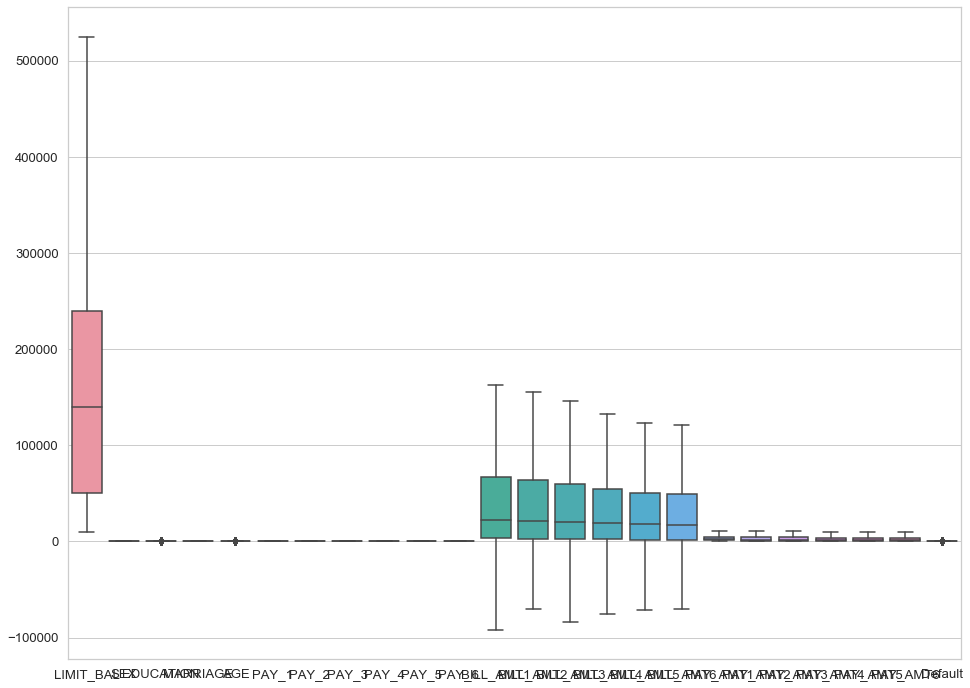

In [42]:
sns.boxplot(data=df) 

In [43]:
# draw histogram to my data set
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

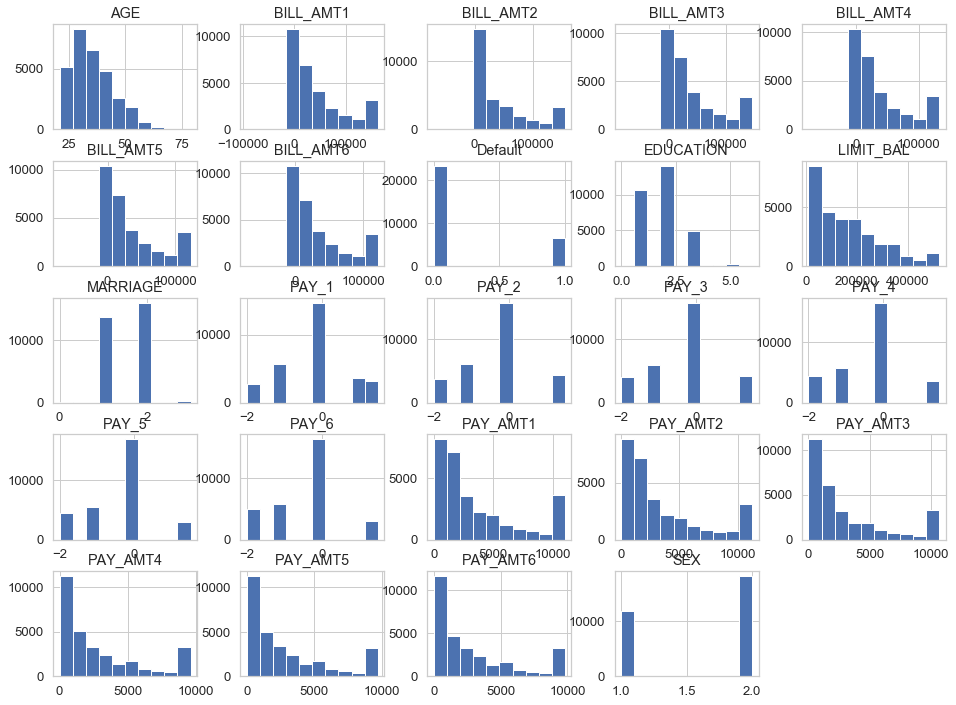

In [44]:
#show of histmap
df.hist()
pyplot.show()

In [45]:
totCol = len(df.columns)
totAttr = totCol-1

In [46]:
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

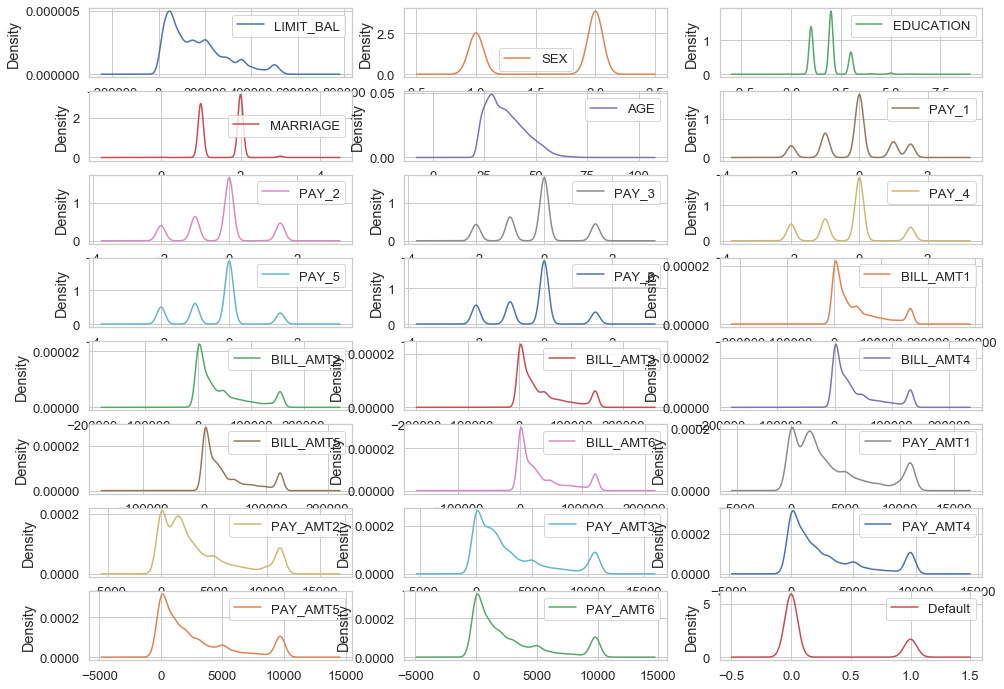

In [47]:
#vizualiztion using density plot
#df.plot(kind='density', subplots=True, layout=(10,8), sharex=False) #(or)
df.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
pyplot.show()

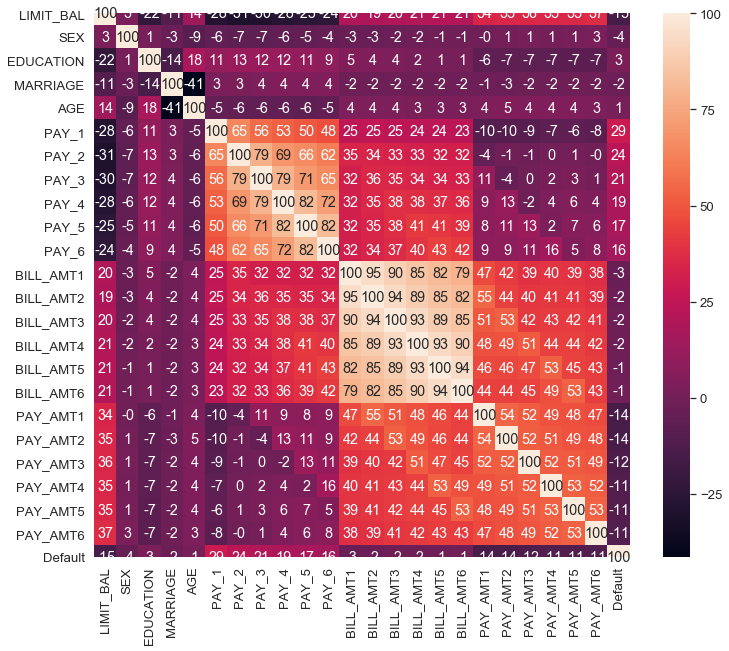

In [48]:
#checking corelation of each variable in our data

from matplotlib import pyplot as plt
corr = df.corr()
plt.figure(figsize=(12,10))
corr = corr * 100
sns.heatmap(corr, annot = True, fmt = '.0f')

# Normalization or Standardization 

In [58]:
## using standard scaler done preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                     'BILL_AMT3','BILL_AMT4', 'BILL_AMT5']]))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [59]:
print(scaler.transform(df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                     'BILL_AMT3','BILL_AMT4', 'BILL_AMT5']]))

[[-1.00115849e+00 -7.73702768e-01 -9.04708213e-01 ... -8.44488885e-01
  -8.54980499e-01 -8.46066974e-01]
 [-1.00115849e+00 -6.85669640e-01 -6.06696856e-01 ... -8.01811106e-01
  -7.78443863e-01 -7.59465436e-01]
 [-5.66535787e-01 -5.44137281e-01 -6.06696856e-01 ... -5.68892795e-01
  -5.19758457e-01 -4.71386863e-01]
 ...
 [-1.00115849e+00 -9.68734359e-01  2.27730806e+00 ... -8.00183655e-01
  -3.66615012e-01 -3.30167453e-01]
 [ 2.15257606e+00 -3.76673278e-03 -5.53650834e-01 ...  7.74718447e-01
   3.79476833e-01 -5.48914665e-01]
 [-4.06200667e-01 -4.59217865e-01 -4.78551972e-01 ...  2.06395196e-01
  -3.75984856e-04 -3.32407346e-02]]


In [ ]:
# Split-out training and test datasets
# We create a training dataset (variable name "training") and a testing dataset (variable name "test")

In [49]:
X = df.iloc[:,0:23]
y = df.iloc[:,23]
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,1.5,1.5,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0,689.0,0.0,0.0,0,0.0
1,120000,2,2,2,26,-1.0,1.5,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0,1000.0,1000.0,1000.0,0,2000.0
2,90000,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518,1500.0,1000.0,1000.0,1000,5000.0
3,50000,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000,2019.0,1200.0,1100.0,1069,1000.0
4,50000,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000,11250.5,10000.0,9000.0,689,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0.0,0.0,0.0,0.0,0.0,...,146412.5,88004.0,31237.0,15980.0,8500,11250.5,5003.0,3047.0,5000,1000.0
29996,150000,1,3,2,43,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837,3526.0,8998.0,129.0,0,0.0
29997,30000,1,2,2,37,1.5,1.5,1.5,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0,0.0,10677.5,4200.0,2000,3100.0
29998,80000,1,3,1,41,1.0,-1.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,11015,3409.0,1178.0,1926.0,9700,1804.0


In [50]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 30000, dtype: int64

In [51]:
##Divide the data as train & test using train test split with test as 0.25 size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [52]:
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_test.shape: {} Y_test.shape: {}".format(X_test.shape, y_test.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_train.shape: (22500, 23) y_train.shape: (22500,)
X_test.shape: (7500, 23) Y_test.shape: (7500,)
Total time for data handling and visualization: 0:05:22.536278


# Loading the algorithms 

In [60]:
num_folds = 15
scoring = 'accuracy'
seedNum=777

In [61]:
models = []
##models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [62]:
##using for loop print my results
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

CART: 0.722533 (0.010085)
Model training time: 0:00:22.516608
NB: 0.608711 (0.011497)
Model training time: 0:00:01.299001
KNN: 0.754044 (0.012080)
Model training time: 0:00:09.154206
BT: 0.803156 (0.011779)
Model training time: 0:02:17.758877
RF: 0.804178 (0.012262)
Model training time: 0:00:27.493628
ET: 0.798711 (0.014281)
Model training time: 0:00:15.891429
AB: 0.817111 (0.011777)
Model training time: 0:01:30.422197
GBM: 0.821422 (0.011758)
Model training time: 0:02:28.189846
Average metrics (accuracy) from all models: 0.7662333333333333


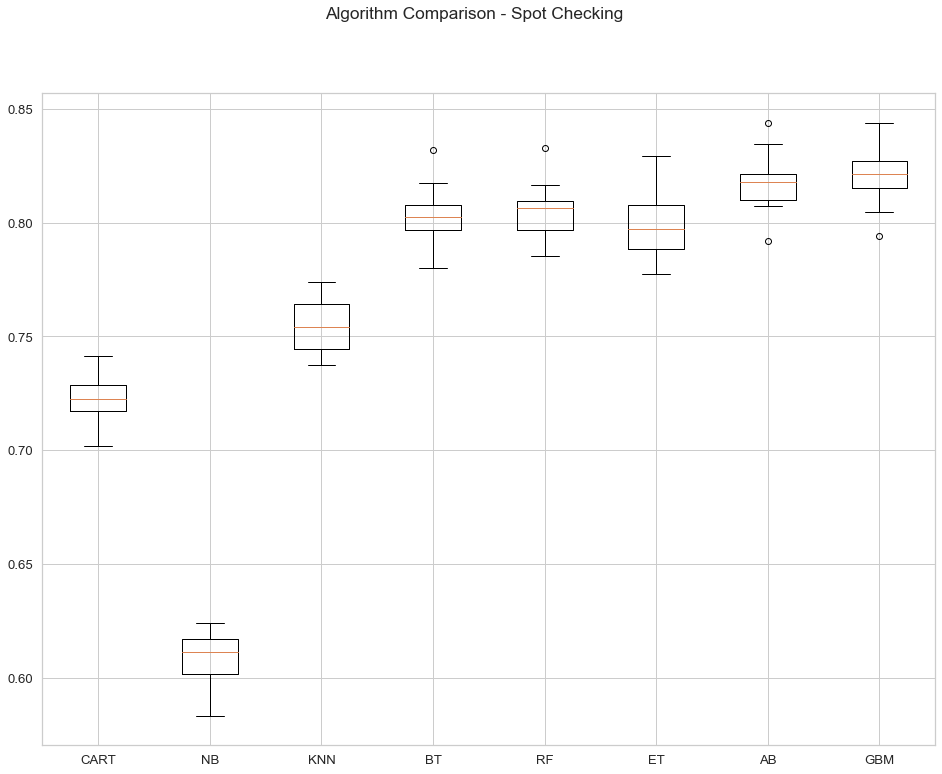

In [63]:
## draw a plot of accuracy of all models
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

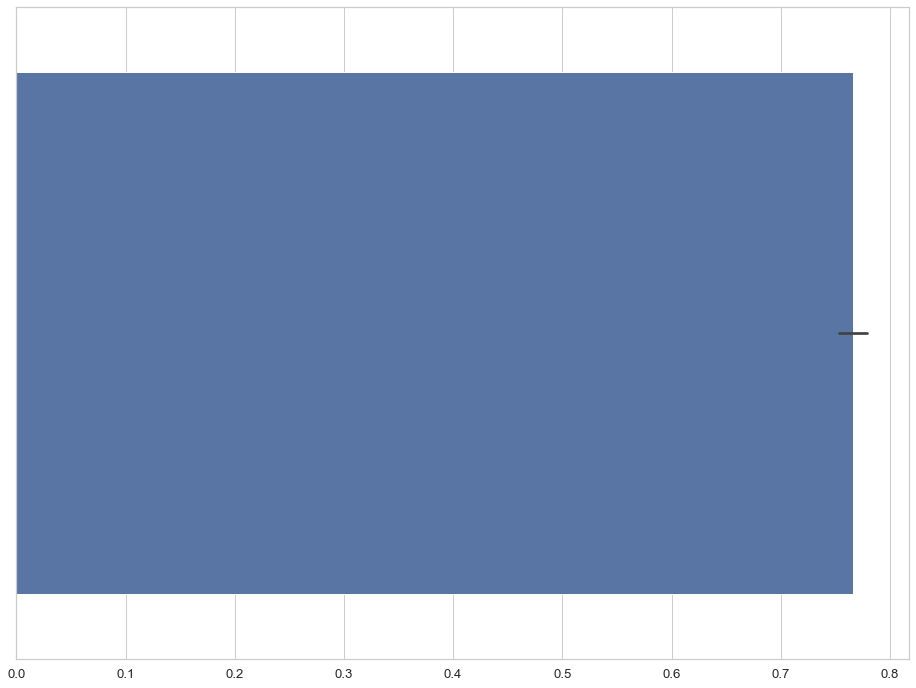

In [64]:
sns.barplot(results)

# Applying Grid Search

In [65]:
#  Improve Accuracy
# a) Algorithm Tuning
# Set up the comparison array
results = []
names = []

In [67]:
# Tuning algorithm #1 - AdaBoost
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([500,600,700,800,900]))
model4 = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, y_train)

In [68]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.818356 using {'n_estimators': 500}
0.818356 (0.011717) with: {'n_estimators': 500}
0.818356 (0.011308) with: {'n_estimators': 600}
0.818178 (0.011847) with: {'n_estimators': 700}
0.818133 (0.011406) with: {'n_estimators': 800}
0.818133 (0.011089) with: {'n_estimators': 900}
Model training time: 1:47:17.948809


In [69]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([400,500,600,700,800]))
model5 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, y_train)

In [70]:
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.818756 using {'n_estimators': 400}
0.818756 (0.012166) with: {'n_estimators': 400}
0.817733 (0.011677) with: {'n_estimators': 500}
0.818533 (0.012541) with: {'n_estimators': 600}
0.817733 (0.012149) with: {'n_estimators': 700}
0.817822 (0.012028) with: {'n_estimators': 800}
Model training time: 1:10:35.358295


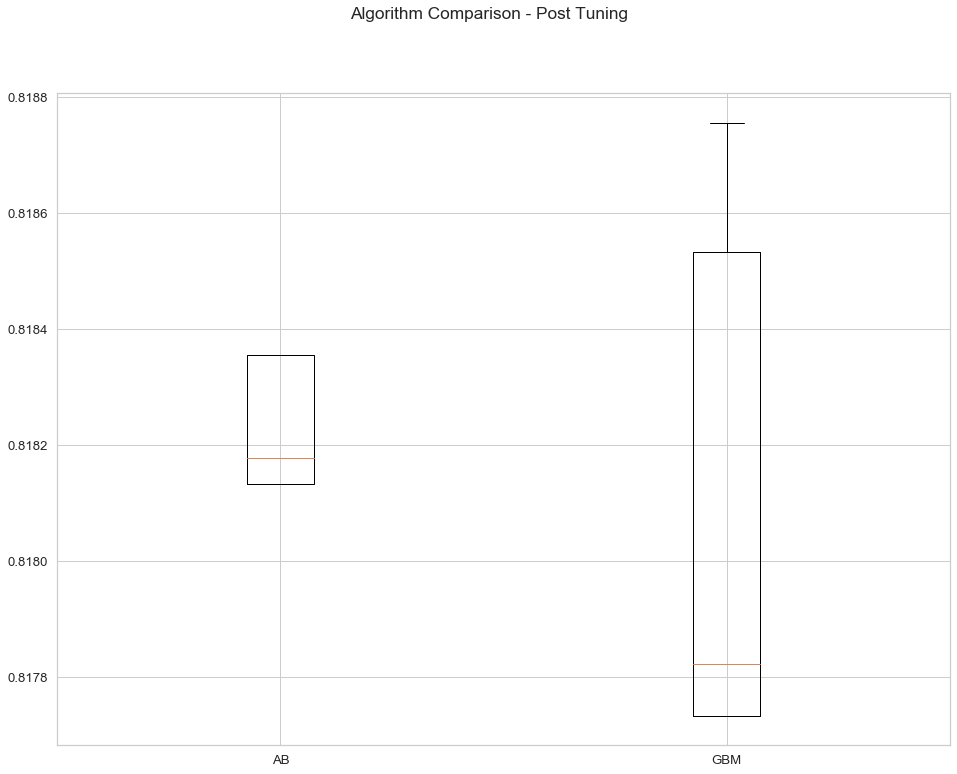

In [71]:
##Compare Algorithms After Tuning
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [72]:
#  Finalize Model
#  Predictions on test dataset
model = GradientBoostingClassifier(n_estimators=400, random_state=seedNum)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8193333333333334
[[5539  293]
 [1062  606]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5832
           1       0.67      0.36      0.47      1668

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [73]:
#  Create standalone model on entire training dataset
startTimeModule = datetime.now()
finalModel = GradientBoostingClassifier(n_estimators=800, random_state=seedNum)
finalModel.fit(X_train, y_train)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:01:21.354706


# saving model using joblib

In [74]:
import pickle
from sklearn.externals import joblib

In [75]:
 joblib.dump(model, 'model_joblib')

['model_joblib']

In [76]:
lib = joblib.load('model_joblib')

In [77]:
 lib.predict

<bound method GradientBoostingClassifier.predict of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='auto',
                           random_state=777, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [ ]:
# Define new instace
# define one new instance
#Xnew = [[1.79415228, 2.10495117, 5,245,854,2132,34636,0,235,345,353,268464,352,
         #90435,363246,326326,84754,0,0,0]]

In [ ]:
# make a prediction
#ynew = finalModel.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))